# Ferromagnetically Coupled Layers

Consider a system with top (T) and bottom (B) layers ferromagnetically coupled, described by the Hamiltonian:

$$
H = H_{\tau} + H_{\text{int}}
$$

where $\tau$ represents either the top (T) or bottom (B) layer. The Hamiltonian is divided into intra-layer ($H_{\tau}$) and inter-layer ($H_{\text{int}}$) components.

## Intra-layer Hamiltonian

For each layer $\tau$, the intra-layer Hamiltonian $H_{\tau}$ consists of ferromagnetic exchange ($H_{\text{FM},\tau}$), Dzyaloshinskii-Moriya interaction ($H_{\text{DMI},\tau}$), and external magnetic field ($H_{\text{ext},\tau}$) terms:

$$
\begin{align*}
H_{\tau} &= H_{\text{FM},\tau} + H_{\text{DMI},\tau} + H_{\text{ext},\tau} \\
H_{\text{FM},\tau} &= -J\sum_{\langle i,j \rangle} \hat{S}_i^{\tau} \cdot \hat{S}_j^{\tau} \\
H_{\text{DMI},\tau} &= D\sum_{\langle \langle i,j \rangle \rangle} \hat{\mathbf{z}} \cdot (\hat{S}_i^{\tau} \times \hat{S}_j^{\tau}) \\
H_{\text{ext},\tau} &= -h\sum_i \hat{S}_{i,z}^{\tau} \\
H_{\text{int}} &= -J_{\alpha}\sum_{\substack{i \in T \\ j \in B; \alpha}} \hat{S}_i \cdot \hat{S}_j
\end{align*}
$$

## Using Linearized Holstein-Primakoff Transformation

The transformation is given by:

$$
\begin{align*}
\hat{S}_j^{+} &= \sqrt{2S} \hat{b}_j \\
\hat{S}_j^{-} &= \sqrt{2S} \hat{b}_j^{\dagger} \\
\hat{S}_j^{z} &= S - \hat{b}_j^{\dagger} \hat{b}_j
\end{align*}
$$

## The Derivation Process

The Hamiltonian components, after applying the linearized Holstein-Primakoff transformation, become:

$$
\begin{align*}
H_{\text{FM},\tau} &= -\sum_{\langle i,j \rangle} \frac{J}{2} (\hat{S}_i^+\hat{S}_j^- + \hat{S}_i^-\hat{S}_j^+) - J\sum_{\langle i,j \rangle} S_i^zS_j^z \\
H_{\text{FM},\tau} &= -SJ\sum_{\langle i,j \rangle} (\hat{b_i^\dagger}\hat{b_j} + \hat{b_i}\hat{b_j^\dagger}) + JS\sum_j (\hat{b_j^\dagger}\hat{b_j} + \hat{b_{j+1}^\dagger}\hat{b_{j+1}}) \text{ (Ignoring bbbb and constant } -JS^2) \\
H_{\text{DMI},\tau} &= -DSi\sum_{\langle \langle i,j \rangle \rangle} v_{i,j} \hat{b}_i^{\dagger} \hat{b}_j \\
H_{\text{ext},\tau} &= -h\sum_i (S - \hat{b}_i^{\dagger}\hat{b}_i) \\
H_{\text{int}} &= v_{\alpha}\sum_{\substack{i \in T, j \in B; \alpha}} (-\hat{b}_i^{\dagger}\hat{b}_j - \hat{b}_j^{\dagger}\hat{b}_i + \hat{b}_j^{\dagger}\hat{b}_j + \hat{b}_i^{\dagger}\hat{b}_i)
\end{align*}
$$

Finally, by simplifying and rearranging the terms, we define(btw, we used PBC and three counts via NN thats why z=3)_:

$$
\begin{align*}
v_S &= JS, v_D = DS, v'_S = zv_S + h, v_{\alpha} = J_{\alpha}S \\
H_{\tau} &= v'_s\sum_{i}b_{i}^{\dagger}b_{i}-v_{s}\sum_{\langle i,j \rangle}b_{i}^{\dagger}b_{j}-v_{D}\sum_{\langle \langle i,j \rangle \rangle}iv_{i,j}\hat{b_{i}}^{\dagger}\hat{b_{j}}
\end{align*}
$$
let the length of crystal to be one
### the element of diagonal elements
 next nearst hopping

In [30]:
from sympy import symbols, sin, cos, sqrt, exp, I, simplify, diff
def nnn(νD1, kx1, ky1,a):
    #a used for choose return value,if a==1,return hdmi, if a==2,return vi,vj
    νD, kx ,ky =symbols('νD,kx,ky')
    v = [ I, -I, -I, -I, I, I]
    r_vectors = [
        (0, 0),
        (sqrt(3), 0),
        (sqrt(3)/2, 3/2),
        (sqrt(3)/2,-3/2),        
        (-sqrt(3), 0),
        (-sqrt(3)/2, -3/2),
        (-sqrt(3)/2, 3/2)]

    # Create a list to hold our expressions
    expressions = []

    # Generate the exponential expressions for each r vector
    for i, (rx, ry) in enumerate(r_vectors[1:], start=1):  # Correctly use r_vectors; skip the first element (0,0) as it does not match v length
        # This is the dot product (kx*rx + ky*ry)
        dot_product = kx*rx + ky*ry
        expr = sp.exp(dot_product*I) * v[i-1] # Adjust index for v as we skip the first element in r_vectors
        expressions.append(expr)

    # The sum of all the exponential expressions
    total_expression = -νD*sum(expressions)    
    expx=diff(total_expression,kx)
    expy=diff(total_expression,ky)
    if(a==1):#numerization
        totalres=total_expression.evalf(subs={kx:kx1,ky:ky1,νD:νD1})
        resx=expx.evalf(subs={kx:kx1,ky:ky1,νD:νD1})
        resy=expy.evalf(subs={kx:kx1,ky:ky1,νD:νD1})
        return totalres,resx,resy 
    else:
        return total_expression,expx,expy


In [33]:
Hdmi,_,_=nnn(1,1,1,0)
print(Hdmi)

-νD*(I*exp(I*(-sqrt(3)*kx/2 - 1.5*ky)) + I*exp(I*(-sqrt(3)*kx/2 + 1.5*ky)) - I*exp(I*(sqrt(3)*kx/2 - 1.5*ky)) - I*exp(I*(sqrt(3)*kx/2 + 1.5*ky)) + I*exp(sqrt(3)*I*kx) - I*exp(-sqrt(3)*I*kx))


  to simplify it, we get:
\begin{array}{c}
    H_{DMI}=-iv_{D}(-2e^{\frac{\sqrt{3}ik_x}{2}}cos(\frac{3k_y}{2})+2isin(\sqrt{3}k_x)+2e^{-\frac{i\sqrt{3}k_x}{2}}cos(\frac{k_y}{2}))\\
    H_{DMI}=-iv_{D}(-4isin(\frac{\sqrt{3}k_x}{2})cos(\frac{3k_y}{2})+2isin(\sqrt{3}k_x))\\
    H_{DMI}=4v_{D}sin(\frac{\sqrt{3}k_x}{2})(cos(\frac{\sqrt{3}k_x}{2})-cos(\frac{3k_y}{2}))
\end{array}
### the element of non-diagonal elements

In [34]:
def nn(kx1, ky1,a):
    #fk
    kx ,ky =symbols('kx,ky')
    r_factors = [
        (0, 0),
        (0, -1),
        (-sp.sqrt(3)/2, 1/2),
        (sp.sqrt(3)/2, 1/2)]
    expression = []
    for i, (rx, ry) in enumerate(r_factors[1:], start=1):
        dot = kx*rx + ky*ry
        expr = sp.exp(dot*I)
        expression.append(expr)
    total = sum(expression)
    expx=diff(total,kx)
    expy=diff(total,ky)
    if(a==1):
        totalres=total.evalf(subs={kx:kx1,ky:ky1})
        resx=expx.evalf(subs={kx:kx1,ky:ky1})
        resy=expy.evalf(subs={kx:kx1,ky:ky1})
        return totalres,resx,resy 
    else:
        return total,expx,expy
 

In [35]:
fk,_,_=nn(1,1,0)
print(fk)

exp(I*(-sqrt(3)*kx/2 + 0.5*ky)) + exp(I*(sqrt(3)*kx/2 + 0.5*ky)) + exp(-I*ky)


To simplify, we arrive at the following expression:

$$
f_k = e^{i\frac{k_x}{2}}\left(2\cos\left(\frac{\sqrt{3}k_x}{2}\right)+e^{-i\frac{3k_y}{2}}\right)
$$

noting that $f_k$ only appears within the layer.

### Dealing with $H_{\text{int}}$

When addressing $H_{\text{int}}$, the coupling terms emerge in the interlayer interactions. Taking the crystal structure into account, it becomes apparent that $J_0$ only couples with atoms directly aligned, whereas $J_1$ and $J_2$ relate to the nearest coupling. Consequently, we can deduce the values of $v_1$ and $v_2$.

In [7]:
from sympy import symbols, sin, cos, sqrt, exp, I, simplify
def hamiltonian(kx,ky,vd,v0,a):
    z=3
    v1=0
    v2=0
    vs=0.5
    h=0.1
    vs1=z*vs+h#vs'
    epsil=[vs1+z*(v1+v2),vs1+v0+z*v2,vs1+v0+z*v2,vs1+z*(v1+v2)];
    if(a==1):
        mk = np.array(nnn(vd, kx, ky,a),dtype=np.complex128).reshape(3,1)
        fk=np.array(nn(kx,ky,a),dtype=np.complex128).reshape(3,1)
        fk_star=np.conjugate(fk)
        vector = np.array([[1], [0], [0]])
        A1_k = np.array([[epsil[0]*vector + mk, -vs*fk],
                         [-vs*fk_star, epsil[1]*vector - mk]])
        A2_k = np.array([[epsil[2]*vector+ mk, -vs*fk],
                         [-vs*fk_star, epsil[3]*vector - mk]])
        B_k = np.array([[-v2*fk, -v1*fk],
                        [-v0*vector, -v2*fk]])
        H1=np.block([[A1_k[:,:,0].reshape(2,2),B_k[:,:,0].reshape(2,2)],
                    [np.swapaxes(B_k[:,:,0].conjugate(),0,1).reshape(2,2),A2_k[:,:,0].reshape(2,2)]]);
        H2=np.block([[A1_k[:,:,1].reshape(2,2),B_k[:,:,1].reshape(2,2)],
                    [np.swapaxes(B_k[:,:,1].conjugate(),0,1).reshape(2,2),A2_k[:,:,1].reshape(2,2)]]);
        H3=np.block([[A1_k[:,:,2].reshape(2,2),B_k[:,:,2].reshape(2,2)],
                    [np.swapaxes(B_k[:,:,2].conjugate(),0,1).reshape(2,2),A2_k[:,:,2].reshape(2,2)]])
        return H1,H2,H3    
    else:
        H=hamiltonian1(kx,ky,vd,v0,a)
        return H

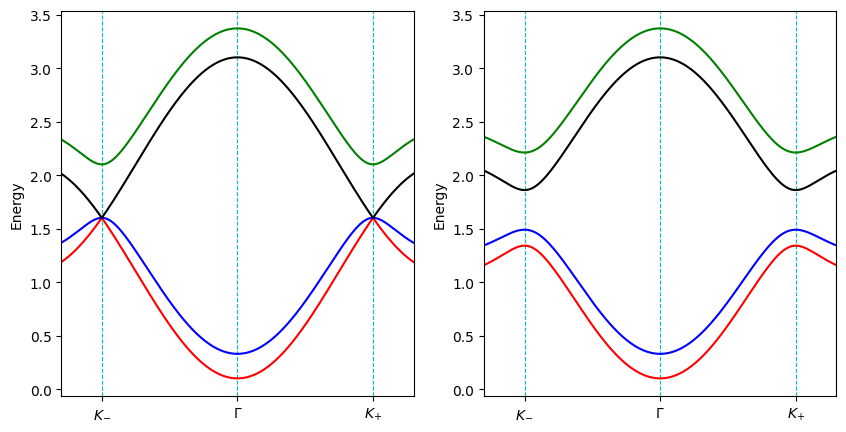

In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from math import *
import cmath
#pyth
gamma=np.array([0,0]);
knp=np.array([-pi,0])
kpp=-knp
kmi=np.array([-4*pi/3/np.sqrt(3),0])
kpl=-kmi
kn=100 
n=4
v0=0.25
vd=np.array([0, 0.05])

kx_array = np.zeros(kn * n)  
#pi- k-
kx_array[0:kn] = np.linspace(knp[0], kmi[0], kn)
#k- Gamma
kx_array[kn:2 * kn] = np.linspace(kmi[0], gamma[0], kn)
#Gamma k+
kx_array[2 * kn:3 * kn] = np.linspace(gamma[0], kpl[0], kn)
#k+ pi
kx_array[3 * kn:4 * kn] = np.linspace(kpl[0], kpp[0], kn)

#informations of pictures
pic=len(vd)
kpath = np.zeros(kn * n)
kpath[0:kn] = np.linspace(0, np.linalg.norm(kmi-knp), kn)
kpath[kn:2 * kn] = np.linspace(kpath[kn - 1], kpath[kn - 1] + np.linalg.norm(gamma - kmi), kn)
kpath[2 *kn:3 * kn] = np.linspace(kpath[2*kn - 1], kpath[2*kn - 1] + np.linalg.norm(kpl - gamma), kn)
kpath[3 *kn:4 * kn] = np.linspace(kpath[3*kn - 1], kpath[3*kn - 1] + np.linalg.norm(kpp - kpl), kn)

#eigenvalue
dim,_,_= hamiltonian(0, 0 ,0, v0,1)
dim=dim.shape[0]  
eigenvalue_k = np.zeros((n * kn, dim))  
fig = plt.figure(figsize=(10,5)) 
i0=0

for i in range(pic):
    ax=fig.add_subplot(1,2,i+1)
    for kn0 in range(n * kn):
        kx = kx_array[kn0]
        ky = 0
        a,_,_=hamiltonian(kx,ky,vd[i],v0,1)
        a = np.array(a)
        eigenvalue, eigenvector = np.linalg.eig(a)  
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:]))  
        i0 += 1    
    for dim0 in range(dim):  
        color = ['-r', '-b','-k','-g']  # the color of line
        plt.plot(kpath, eigenvalue_k[:, dim0], color[dim0])

    plt.ylabel("Energy")
    ax.set_xticks([kpath[kn - 1], kpath[2 * kn - 1],kpath[3 * kn - 1]])  
    ax.set_xticklabels([r'$K_{-}$', '$\Gamma$', '$K_{+}$']) 
    plt.xlim(0, kpath[4 * kn - 1])  
    plt.grid(axis="x", c="c", linestyle="--")  
    i0=0

plt.show()





# berry curvature of the bulk bands 
\begin{equation}
    \Omega_{ij;\mu}(\boldsymbol{k})=-2\sum_{\mu\ne\mu'}\frac{Im[\left \langle P_{\boldsymbol{k}\mu}|v_{i}|P_{\boldsymbol{k}\mu'} \right \rangle\left \langle P_{\boldsymbol{k}\mu'}|v_{j}|P_{\boldsymbol{k}\mu} \right \rangle]}{(\epsilon_{\boldsymbol{k}\mu}-\epsilon_{\boldsymbol{k}\mu'})^2}
\end{equation}
where,$\frac{\partial H_{FM}}{\partial k_i}$ with i,j=x,y $P_{\boldsymbol{k}\mu}$ are the eigenvectors and $\mu$ labels the bands

In [36]:
def compute_omega(kx_ky):
    kn0, ky0, kx_array, vd, v0 = kx_ky
    kx = kx_array[kn0]
    ky = kx_array[ky0]
    a, vx, vy = hamiltonian(kx, ky, vd, v0)
    eigenvalue, eigenvector = np.linalg.eig(a)
    sorted_indices = np.argsort(np.real(eigenvalue))
    eigenvalue = eigenvalue[sorted_indices]
    eigenvector = eigenvector[:, sorted_indices]
    tempx = np.dot(np.conjugate(eigenvector).T, np.dot(vx, eigenvector))
    tempy = np.dot(np.conjugate(eigenvector).T, np.dot(vy, eigenvector))
    np.fill_diagonal(tempx, 0)
    np.fill_diagonal(tempy, 0)
    res = np.imag(tempx*tempy.T)
    dim = a.shape[0]
    eigenmu = np.tile(eigenvalue, (dim, 1)) - np.tile(eigenvalue[:, np.newaxis], (1, dim))
    np.fill_diagonal(eigenmu, 1)
    eigmu = np.real(eigenmu * np.conjugate(eigenmu))
    res /= eigmu
    return -2 * res.sum(axis=1).reshape(2, 2)

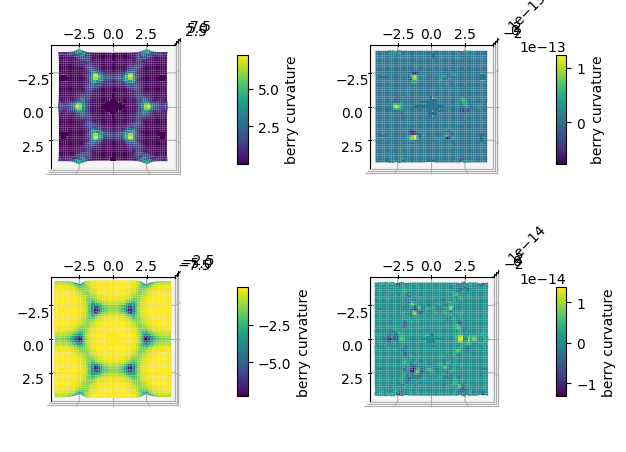

In [37]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt 
from math import *
import cmath
kn=50 
n=1
vd=0.05
v0=0.25
kx_array=np.linspace(-4,4,n*kn)
dim,_,_= hamiltonian(0, 0 ,0, v0,1)
dim=dim.shape[0]
omega=np.zeros((n*kn,n*kn,2,2))
for kn0 in range(n*kn):
    for ky0 in range(n*kn):
        kx = kx_array[kn0]
        ky = kx_array[ky0]
        a,vx,vy=hamiltonian(kx,ky,vd,v0,1)
        a = np.array(a)
        vx=np.array(vx)
        vy=np.array(vy)
        eigenvalue, eigenvector = np.linalg.eig(a)  
        sorted_indices = np.argsort(np.real(eigenvalue))
        eigenvalue=eigenvalue[sorted_indices]
        eigenvector=eigenvector[:,sorted_indices]
        tempx=np.dot(np.conjugate(eigenvector).T,np.dot(vx,eigenvector))
        tempy=np.dot(np.conjugate(eigenvector).T,np.dot(vy,eigenvector))
        np.fill_diagonal(tempx,0)
        np.fill_diagonal(tempy,0)
        res=np.imag(tempx*tempy.T)
        eigenmu = np.tile(eigenvalue,(dim,1))-np.tile(eigenvalue,(dim,1)).T
        np.fill_diagonal(eigenmu,1)
        eigmu=np.real(eigenmu*eigenmu.conjugate())
        res=res/eigmu
        block_sums = res.sum(axis=1)
        result_matrix = block_sums.reshape(2, 2)
        omega[kn0,ky0,:,:]=-2*result_matrix
        
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

kx,ky=np.meshgrid(kx_array,kx_array)
fig = plt.figure()

i0=1
for i in range(2):
    for j in range(2):
        ax=fig.add_subplot(2,2,i0,projection='3d')
        surf=ax.plot_surface(kx,ky,omega[:,:,i,j], cmap='viridis')
        ax.view_init(elev=90, azim=0)
        fig.colorbar(surf, ax=ax, label='berry curvature',shrink=0.5,aspect=10,pad=0.1)
        i0+=1
plt.tight_layout()
plt.show()

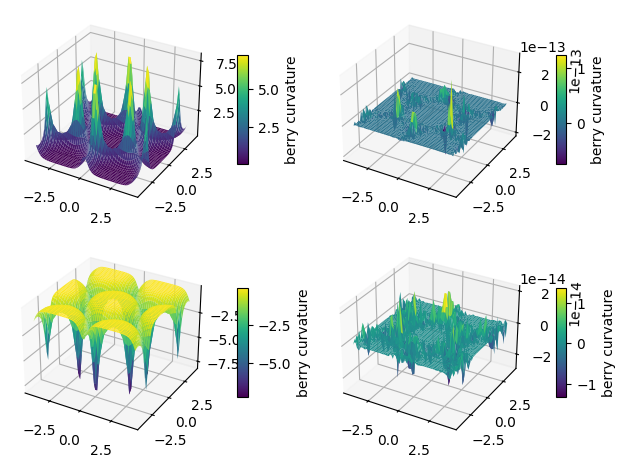

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
kx_array=np.linspace(-4,4,n*kn)
i0=1
kx,ky=np.meshgrid(kx_array,kx_array)
fig = plt.figure()
for i in range(2):
    for j in range(2):
        ax=fig.add_subplot(2,2,i0,projection='3d')
        surf=ax.plot_surface(kx,ky,omega[:,:,i,j], cmap='viridis')
        #ax.view_init(elev=90, azim=0)
        fig.colorbar(surf, ax=ax, label='berry curvature',shrink=0.5,aspect=10,pad=0.1)
        i0+=1
plt.tight_layout()
plt.show()

## Edge state(zigzag)
we set eight sites to rewrite halmitonian
and the hopping between different sub-lattice:
![nnn](nnn.png)
zigzag:
<img src="sites.jpg" alt="示例图片" width="300"/>
![zigzag](zigzag.jpg)
the bottom picture comes from https://zhuanlan.zhihu.com/p/646845157?utm_psn=1755042004298301440

In [214]:
def hh0(v0,vd,nslab):
    #center
    #0:center,1:up,2:down
    z=3
    v1=0
    v2=0
    vs=0.5
    h=0.1
    vs1=z*vs+h#vs'
    h00=np.array([[ v0+vs1, -vs, -1j*vd,     0,   -v2,   -v0,   -v1,     0],
                  [   -vs,  vs1,    -vs,-1j*vd,   -v1,   -v2,   -v1,     0],
                  [+1j*vd,   -vs,v0+vs1,   -vs,     0,     0,   -v2,   -v0],
                  [     0,+1j*vd,   -vs,   vs1,     0,     0,   -v1,   -v2],
                  [   -v1,   -v2,     0,     0,   vs1,   -vs, 1j*vd,     0],
                  [   -v0,   -v1,     0,     0,   -vs,v0+vs1,   -vs, 1j*vd],
                  [   -v1,   -v2,   -v1,   -v2,-1j*vd,   -vs,   vs1,   -vs],
                  [     0,   -v1,   -v0,   -v1,     0,-1j*vd,   -vs,v0+vs1]])
    h01=np.array([[     0,     0,-1j*vd,   -vs,     0,     0,     0,   -v2],
                  [     0,     0,     0,-1j*vd,     0,     0,     0,   -v1],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0, 1j*vd,   -vs],
                  [     0,     0,     0,     0,     0,     0,     0, 1j*vd],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0]])
    h02=np.array([[     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [+1j*vd,     0,     0,     0,     0,     0,     0,     0],
                  [   -vs,+1j*vd,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,-1j*vd,     0,     0,     0],
                  [   -v1,   -v2,     0,     0,   -vs,-1j*vd,     0,     0]])
    H0_part1 = np.kron(np.eye(nslab), h00)

    diagonal_nslab_minus_1 = np.diag(np.ones(nslab-1), k=1)
    diagonal_nslab_minus_1_neg = np.diag(np.ones(nslab-1), k=-1)
    H0_part2 = np.kron(diagonal_nslab_minus_1, h01)
    H0_part3 = np.kron(diagonal_nslab_minus_1_neg, h02)

    H0 = H0_part1 + H0_part2 + H0_part3
    #OPC
    return H0
    

In [215]:
def hh1(v0,vd,nslab):
    #center to right
    z=3
    v1=0
    v2=0
    vs=0.5
    h=0.1
    vs1=z*vs+h#vs'
    h10=np.array([[  +1j*vd,       0,       0,       0,       0,       0,       0,     0],
                  [     -vs,  -1j*vd,       0,  +1j*vd,       0,       0,       0,     0],
                  [  -1j*vd,       0,  +1j*vd,     -vs,       0,       0,       0,     0],
                  [       0,       0,       0,  -1j*vd,       0,       0,       0,     0],
                  [     -v2,       0,       0,       0,  +1j*vd,     -vs,  -1j*vd,     0],
                  [     -v1,     -v2,     -v1,     -v2,       0,  -1j*vd,       0,     0],
                  [       0,       0,     -v2,       0,       0,       0,  +1j*vd,     0],
                  [       0,       0,       0,     -v2,       0,  +1j*vd,     -vs,-1j*vd]])
    h11=np.array([[     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,+1j*vd,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,-1j*vd,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0]])
    h12=np.array([[     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [-1j*vd,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [   -v2,     0,     0,     0,     0,     0,     0,     0],
                  [   -v1,     0,     0,     0,     0,+1j*vd,     0,     0]])
    H1_part1 = np.kron(np.eye(nslab), h10)
    diagonal_ones = np.ones(nslab)
    diagonal_nslab_minus_1 = np.diag(np.ones(nslab-1), k=1)
    diagonal_nslab_minus_1_neg = np.diag(np.ones(nslab-1), k=-1)
    
    H1_part2 = np.kron(diagonal_nslab_minus_1, h11)
    H1_part3 = np.kron(diagonal_nslab_minus_1_neg, h12)

    h1 = H1_part1 + H1_part2 + H1_part3
    return h1

In [216]:
def hh2(v0,vd,nslab):
    #center to left
    z=3
    v1=0
    v2=0
    vs=0.5
    h=0.1
    vs1=z*vs+h#vs'
    h20=np.array([[  -1j*vd,     -vs,  +1j*vd,       0,     -v1,     -v2,       0,       0],
                  [       0,  +1j*vd,       0,       0,       0,     -v1,       0,       0],
                  [       0,       0,  -1j*vd,       0,       0,     -v2,     -v1,       0],
                  [       0,  -1j*vd,     -vs,   +1j*vd,      0,     -v1,       0,     -v1],
                  [       0,       0,       0,       0,  -1j*vd,       0,       0,       0],
                  [       0,       0,       0,       0,     -vs,  +1j*vd,       0,  -1j*vd],
                  [       0,       0,       0,       0,  +1j*vd,       0,  -1j*vd,     -vs],
                  [       0,       0,       0,       0,       0,       0,       0,  +1j*vd]])
    h21=np.array([[     0,     0,+1j*vd,     0,     0,     0,   -v1,   -v2],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,-1j*vd],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0]])
    h22=np.array([[     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,-1j*vd,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0],
                  [     0,     0,     0,     0,+1j*vd,     0,     0,     0],
                  [     0,     0,     0,     0,     0,     0,     0,     0]])
    H2_part1 = np.kron(np.eye(nslab), h20)

    diagonal_nslab_minus_1 = np.diag(np.ones(nslab-1), k=1)
    diagonal_nslab_minus_1_neg = np.diag(np.ones(nslab-1), k=-1)
    H2_part2 = np.kron(diagonal_nslab_minus_1, h21)
    H2_part3 = np.kron(diagonal_nslab_minus_1_neg, h22)

    h2 = H2_part1 + H2_part2 + H2_part3
    return h2

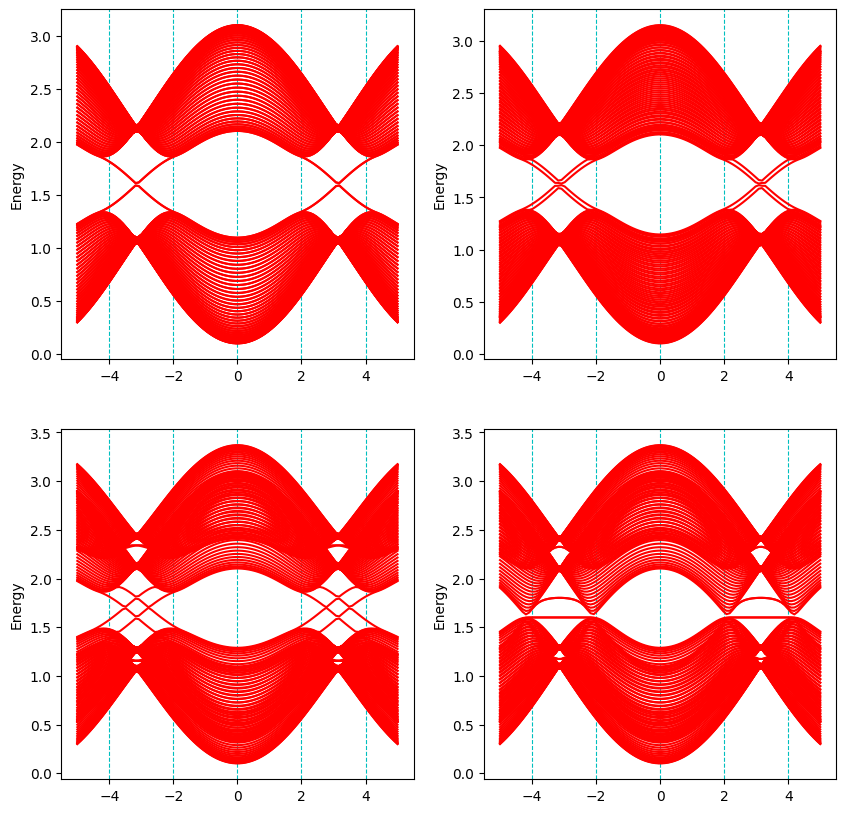

In [218]:
import numpy as np
import matplotlib.pyplot as plt

v0=np.array([ 0, 0.05, 0.25, 0.25])
vd=np.array([ 0.05, 0.05, 0.05, 0])
space=100
kx=np.linspace(-5,5,space)
# caulcudim
nslab=20
dim=hh0(v0[0],vd[0],nslab)+hh1(v0[0],vd[0],nslab)+hh2(v0[0],vd[0],nslab)
dim=dim.shape[0]
totaleigen=np.zeros((dim,space))
pic=4
fig = plt.figure(figsize=(10,10))
i0=1
for j in range(pic):
    for i in range(space):
        #j=2
        v01=v0[j]
        vd1=vd[j]
        H=hh0(v01,vd1,nslab)+hh1(v01,vd1,nslab)*np.exp(-1j*kx[i])+hh2(v01,vd1,nslab)*np.exp(1j*kx[i])
        eigenvalue,eigenvactors =np.linalg.eig(H)
        eigenvalue=np.sort(np.real(eigenvalue))
        totaleigen[:,i]=eigenvalue
    ax=fig.add_subplot(2,2,i0)
    for dim0 in range(dim):  
        plt.plot(kx, totaleigen[dim0 , :],'-r')
    i0+=1
    plt.ylabel("Energy")
    plt.grid(axis="x", c="c", linestyle="--") 

plt.show()

